[-3.  4. -5.]
x:  [ 4  3 -5]
x rotated:  [ 0.70710678  4.94974747 -5.        ]
b rotated back:  [ 4.  3. -5.]
[-5.48322392 -1.39169553  4.24233886]


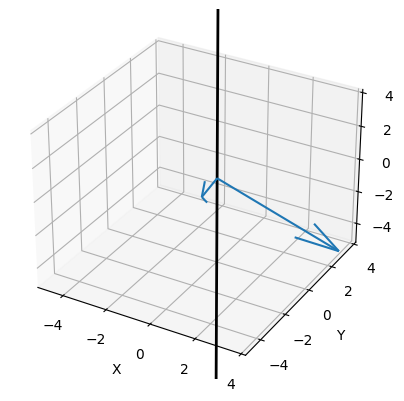

In [61]:
# Exercise 1

#a. 

from numpy import *
from scipy import *
from numpy.linalg import *
import matplotlib.pyplot as plt
import numpy as np

def rotatex(vec,theta):
    xarray = array([[1,0,0],[0, cos(theta), -sin(theta)],[0, sin(theta), cos(theta)]])
    b = xarray.dot(vec)
    return b

def rotatey(vec,theta): 
    yarray = array([[cos(theta), 0, sin(theta)],[0,1,0],[-sin(theta),0,cos(theta)]])
    return yarray.dot(vec)

def rotatez(vec,theta): 
    zarray = array([[cos(theta), -sin(theta), 0],[ sin(theta), cos(theta),0],[0,0,1]])
    return zarray.dot(vec)

# Rotation
x = array([4,3,-5])
b = rotatez(x,pi/2)
print(b)

# Plotting (also the line x = y = 0)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.axis('equal');


ax.quiver(0,0,0,x[0],x[1],x[2])
ax.quiver(0,0,0,b[0],b[1],b[2])

axis_max = max(np.max(x), np.max(b))
axis_min = min(np.min(x), np.min(b))
ax.set_xlim(axis_min, axis_max)
ax.set_ylim(axis_min, axis_max)
ax.set_zlim(axis_min, axis_max)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.plot([0, 0], [0, 0], [-200, 200], color='black', linewidth=2)


# b. 

def rotatezback(vec,theta):
    xarray = inv(array([[cos(theta), -sin(theta), 0],[ sin(theta), cos(theta),0],[0,0,1]]))
    b = xarray.dot(vec)
    return b
                 
# Rotation
x = array([4,3,-5])
b = rotatez(x,pi/4)
print("x: ",x)
print("x rotated: ",b)
b = rotatezback(b,pi/4)
print("b rotated back: ",b)

# c. 

x = array([4,3,-5])
angle = 63*pi/43
x = rotatex(x,angle)
x = rotatey(x,angle)
x = rotatez(x,angle)
print(x)

In [ ]:
from numpy import zeros,empty
from pylab import plot,show

N = 26
C =1.0
m = 1.0
k = 6.0
omega = 2.0
alpha = 2*k-m*omega*omega

A = zeros([N,N],float)
for i in range(N-1): 
    A[i,i] = alpha
    A[i,i+1] = -k
    A[i+1,i] = -k

A[0,0] = alpha - k
A[N-1,N-1] = alpha - k
v = zeros(N,float)
v[0] = C

for i in range(N-1): 
    
    A[i,i+1] /= A[i,i]
    v[i] /= A[i,i]
    
    A[i+1,i+1] -= A[i+1,i]*A[i,i+1]
    v[i+1] -= A[i+1,i]*v[i]

v[N-1] /= A[N-1,N-1]

x = empty(N,float)
x[N-1] = v[N-1]
for i in range(N-2,-1,-1): 
    x[i] = v[i] - A[i,i+1]*x[i+1]

# My stuff

from vpython import *
mass = []
scene = canvas(background=color.gray(0.8))
for n in range(0,N-1): 
    mass.append( box(pos=vector(3*n, 0, 0), length=1, width=1, height=1, color=color.white))
directional_light = distant_light(direction=vector(0.2, 0.5, 1), color=color.yellow)

t = 0
    
while True: 
    rate(3000)
    i = 0
    for m in mass: 
        
        m.pos.x += .0008*x[i]*(sin(omega*t) + cos(omega*t))
        i += 1
    t += .002
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Exercise 6.3: Assymetric Quantum well

#b. 

from numpy import *

def Harg(m,n): 
    L = 5*10**(-10)
    a = 10
    hbar = 6.582119569 * 10**(-16)
    M = .511 * 10**6
    if m == n: 
        r = (hbar**2/(2*M))*(n**2 * pi**2/L**2) + a/2
        return r
    elif (m != n) and (n%2 == 1 or m%2 == 1): 
        return (8*a/pi)*(m*n/((m**2 - n**2)**2))
    else: 
        return 0

print(Harg(40,40)) # So 12 zeroes to reach significance?

5.000000000000027


In [139]:
#c.

from numpy import *

def Harg(m,n): 
    m = m+1
    n = n+1
    L = 5*10**(-10)
    a = 10
    hbar = 6.582119569 * 10**(-16)
    c= 300000000
    M = .511 * 10**6
    if m == n: 
        r = ((hbar**2 * c**2)/(2*M))*(n**2 * pi**2/L**2) +  a/2
        return r
    elif (n%2 == 1 and m%2 == 0) or (n%2 == 0 and m%2 == 1): 
        return -1*(8*a/pi**2)*(m*n/((m**2 - n**2)**2))
    else: 
        return 0

nval = 100
H = array([[Harg(m,n) for n in range(0,nval)] for m in range(0,nval)])

# print(H)
# print(H1)

from numpy.linalg import eigvals
eigs = eigvals(H)
eigs = sorted(eigs)
print(eigs)



[5.839257859835046, 11.189299683213747, 18.681443851517578, 29.17736414004103, 42.7069984979474, 59.26004105613444, 78.83119970957917, 101.41795572926848, 127.01902545082146, 155.63370632231246, 187.2615896063995, 221.9024250495599, 259.5560527379842, 300.22236672406564, 343.9012946128786, 390.592785600309, 440.2968031966569, 493.01332065362425, 548.7423180067636, 607.4837801134793, 669.237695321721, 734.0040545481544, 801.7828506280284, 872.5740778490732, 946.377731612261, 1023.1938081814172, 1103.0223044961583, 1185.863218030425, 1271.7165466843642, 1360.5822887009601, 1452.460442600976, 1547.3510071319442, 1645.2539812276489, 1746.1693639759565, 1850.097154592753, 1957.0373524010986, 2066.989956813985, 2179.954967320543, 2295.9323834743122, 2414.9222048839047, 2536.92443120491, 2661.939062133438, 2789.9660974003577, 2921.0055367668356, 3055.0573800201196, 3192.1216269704355, 3332.198277447735, 3475.2873312997426, 3621.388788389283, 3770.502648592972, 3922.628911799175, 4077.76757790

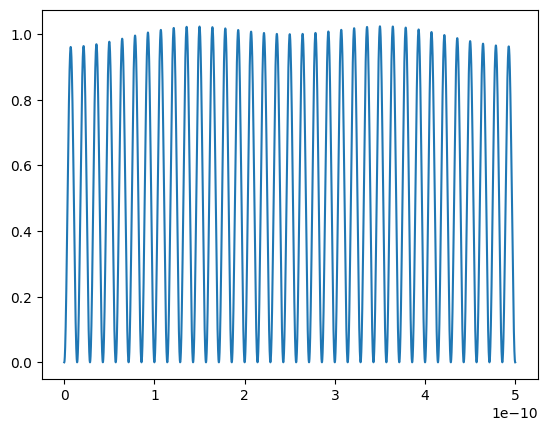

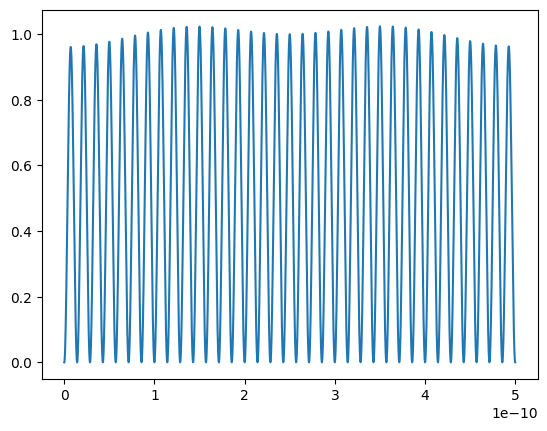

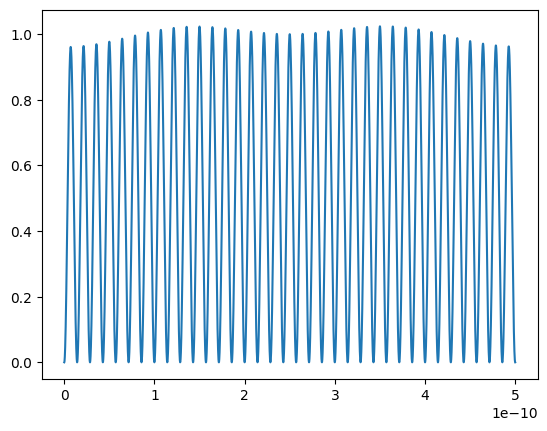

In [167]:
def Harg(m,n): 
    m = m+1
    n = n+1
    L = 5*10**(-10)
    a = 10
    hbar = 6.582119569 * 10**(-16)
    c= 300000000
    M = .511 * 10**6
    if m == n: 
        r = ((hbar**2 * c**2)/(2*M))*(n**2 * pi**2/L**2) +  a/2
        return r
    elif (n%2 == 1 and m%2 == 0) or (n%2 == 0 and m%2 == 1): 
        return -1*(8*a/pi**2)*(m*n/((m**2 - n**2)**2))
    else: 
        return 0

nval = 100
H = array([[Harg(m,n) for n in range(0,nval)] for m in range(0,nval)])

vals,vecs = eig(H)


k = vals.argmin()
coeffground = vecs[k]
valground = vals[k]
vals = delete(vals,k)
vecs = delete(vecs,k,axis = 1)


k = vals.argmin()
coeff1 = vecs[k]
val1 = vals[k]
vals = delete(vals,k)
vecs = delete(vecs,k,axis = 1)


k = vals.argmin()
coeff2 = vecs[k]
val2 = vals[k]
vals = delete(vals,k)
vecs = delete(vecs,k,axis = 1)


def psi(x,vec):
    sum1 = 0
    L = 5*10**(-10)
    for n in range(0,len(vec)): 
        sum1 += vec[n]*sin( pi*x*n/L )
    return sum1
L = 5*10**(-10)


x = linspace(0,L,10000)
yg = (psi(x,coeffground))**2
y1 = (psi(x,coeff1))**2
y2 = (psi(x,coeff2))**2

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(x,yg)
fig,ax2 = plt.subplots()
fig,ax3 = plt.subplots()
ax2.plot(x,y1)
ax3.plot(x,y2)

# ax.plot(x,y1)

